* **Analyzing marketing campaign performances**
* **Attributing credit for the conversion to marketing channels**
* **Calculating marketing metrics**
* **Assessing the impact of the bug on conversions**
* **Creating functions to automate repetitive work**
* **A/B Testing and implementing segmentation in A/B tests**

### Import Libraries

In [1]:
import pandas as pd
import numpy as np 
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

### Load the Dataset

In [2]:
# Import marketing.csv with date columns
marketing = pd.read_csv('marketing.csv', parse_dates=['date_served','date_subscribed','date_canceled'])

In [3]:
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,False
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,False
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,False
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,False
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,False


In [4]:
marketing.shape

(10037, 12)

In [5]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
user_id                10037 non-null object
date_served            10021 non-null datetime64[ns]
marketing_channel      10022 non-null object
variant                10037 non-null object
converted              10022 non-null object
language_displayed     10037 non-null object
language_preferred     10037 non-null object
age_group              10037 non-null object
date_subscribed        1856 non-null datetime64[ns]
date_canceled          577 non-null datetime64[ns]
subscribing_channel    1856 non-null object
is_retained            10037 non-null bool
dtypes: bool(1), datetime64[ns](3), object(8)
memory usage: 872.5+ KB


In [6]:
# Print the statistics of all columns
marketing.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,10037
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,2018-01-15 00:00:00,House Ads,control,False,English,English,19-24 years,2018-01-16 00:00:00,2018-04-02 00:00:00,Instagram,False
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,9460
first,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 00:00:00,2018-01-05 00:00:00,NaN,NaN
last,NaN,2018-01-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-31 00:00:00,2018-05-09 00:00:00,NaN,NaN


# Preprocessing

## Feature Engineering

#### Adding New Column

In [7]:
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, "Facebook": 3, "Email": 4, "Push": 5}

In [8]:
# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

In [9]:
# Add the new column is_correct_lang
marketing['is_correct_lang'] = np.where(marketing['language_preferred'] == marketing['language_displayed'], 'Yes', 'No')
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,is_correct_lang
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,False,1.0,Yes
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,False,1.0,Yes
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,False,1.0,Yes
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,False,1.0,Yes
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,False,1.0,Yes


### Daily Marketing Reach By Channel

In [10]:
# Group by date_served and count number of unique user_id's
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

# Print head of daily_users
print(daily_users.head())

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


#### Plotting Daily Marketing Reach By Channel

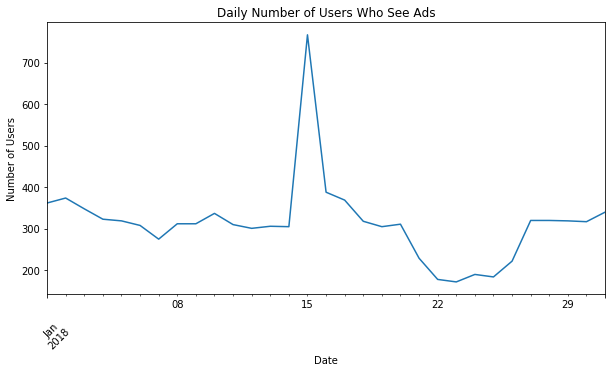

In [11]:
plt.figure(figsize=(10,5))
# Plot daily_subscribers
daily_users.plot()

# Include a title and y-axis label
plt.title('Daily Number of Users Who See Ads')
plt.xlabel('Date')
plt.ylabel('Number of Users')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation = 45)

# Display the plot
plt.show()

# Marketing Metrics


### 1. Conversion Rate

#### The formula for Conversion Rate is:  Number of people who convert/Total number of people who we market to

In [12]:
# Calculate the number of people we marketed to
total = marketing['user_id'].nunique()

# Calculate the number of people who subscribed
subscribers = marketing[marketing['converted']== True]['user_id'].nunique()

# Calculate the conversion rate
conversion_rate = subscribers/total
print(round(conversion_rate*100, 2), "%")

13.89 %


### 2. Retention Rate

#### The formula for Retention Rate is: Number of people who remain subscribed/Total number of people who converted

In [13]:
# Calculate the number of subscribers
total_subscribers = marketing[marketing["converted"] == True]['user_id'].nunique()

# Calculate the number of people who remained subscribed
retained = marketing[marketing['is_retained'] == True]['user_id'].nunique()

# Calculate the retention rate
retention_rate = retained/total_subscribers
print(round(retention_rate*100, 2), "%")

34.48 %


# Customer Segmentation


* **Comparing Language Conversion Rate (I)**

In [14]:
# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of english speaking users
total = english_speakers['user_id'].nunique()

# Calculate the number of english speakers who converted
subscribers = english_speakers[english_speakers['converted'] == True]['user_id'].nunique()

# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:',  round(conversion_rate*100,2), '%')

English speaker conversion rate: 12.92 %


* **Comparing Language Conversion Rate (II)**

In [15]:
# Group by language_displayed and count unique users
total = marketing.groupby(['language_displayed'])['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers = marketing[marketing['converted'] == True].groupby(['language_displayed'])['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = (subscribers/total) 

print(round(language_conversion_rate*100, 1), "%")

language_displayed
Arabic     50.0
English    12.9
German     71.6
Spanish    20.0
Name: user_id, dtype: float64 %


#### Plotting Conversion Rate by Language

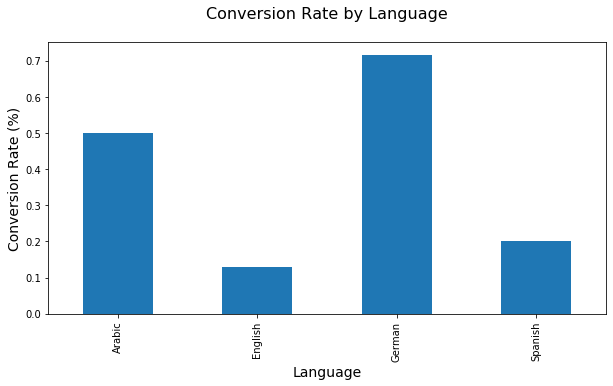

In [16]:
plt.figure(figsize=(10,5))
# Create a bar chart using language_conversion_rate DataFrame
language_conversion_rate.plot(kind='bar')

# Add a title and x and y-axis labels
plt.title('Conversion Rate by Language\n', size = 16)
plt.xlabel('Language', size = 14)
plt.ylabel('Conversion Rate (%)', size = 14)

# Display the plot
plt.show()

* **Aggregating by Date**

In [17]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id'].nunique()

# Group by date_served and count unique converted users
subscribers = marketing[marketing['converted'] == True].groupby(['date_served'])['user_id'].nunique()

# Calculate the conversion rate 
daily_conversion_rate = (subscribers/total)*100
daily_conversion_rate.head()

date_served
2018-01-01     9.944751
2018-01-02     9.893048
2018-01-03    10.344828
2018-01-04    10.835913
2018-01-05    12.539185
Name: user_id, dtype: float64

#### Setting up our data to plot daily conversion rate

In [18]:
# Reset index to turn the results into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rate.reset_index(0))
daily_conversion_rate.head()

,date_served,user_id
0,2018-01-01,9.944751
1,2018-01-02,9.893048
2,2018-01-03,10.344828
3,2018-01-04,10.835913
4,2018-01-05,12.539185


In [19]:
# Rename columns
daily_conversion_rate.columns = ['date_served', 'conversion_rate']
daily_conversion_rate.head()

,date_served,conversion_rate
0,2018-01-01,9.944751
1,2018-01-02,9.893048
2,2018-01-03,10.344828
3,2018-01-04,10.835913
4,2018-01-05,12.539185


#### Plotting Conversion Rate by Date

<Figure size 720x360 with 0 Axes>

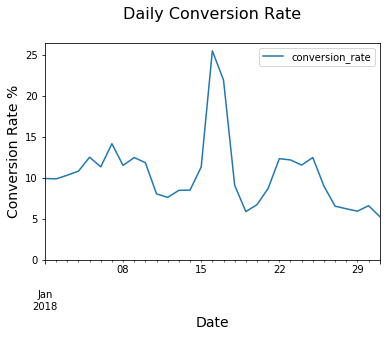

In [20]:
plt.figure(figsize=(10,5))
# Create a line chart using daily_conversion_rate DataFrame
daily_conversion_rate.plot('date_served','conversion_rate')

plt.title('Daily Conversion Rate\n', size=16)
plt.ylabel('Conversion Rate %', size=14)
plt.xlabel('Date', size=14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()

### Grouping and Counting by multiple columns

* **Marketing Channels across Age Groups**

In [21]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])['user_id'].count()
channel_age.head()

marketing_channel  age_group  
Email              0-18 years      93
                   19-24 years    111
                   24-30 years    120
                   30-36 years     60
                   36-45 years     63
Name: user_id, dtype: int64

In [22]:
# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level=1))
channel_age_df

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
marketing_channel,,,,,,,
Email,93,111,120,60,63,65,53
Facebook,264,347,296,249,226,299,179
House Ads,694,761,681,699,589,678,631
Instagram,300,315,286,259,280,227,204
Push,186,145,183,86,193,82,118


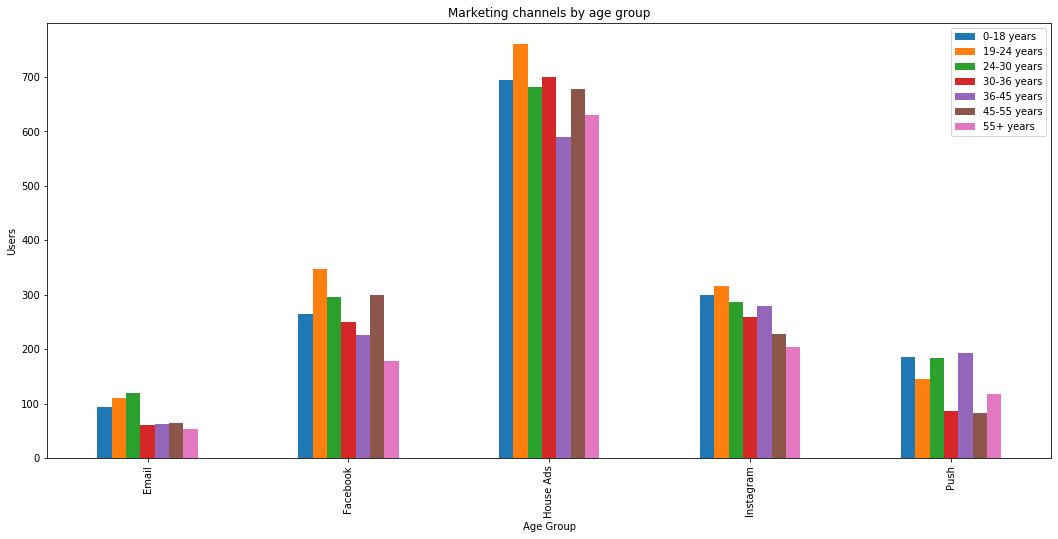

In [23]:
# Plot the results
channel_age_df.plot(kind='bar',figsize =(18,8))
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc='upper right', labels = channel_age_df.columns.values)
plt.show()

* **Subscribing Channels by Date**

In [24]:
# Count the subsscribers by subscribing channel and date subscribed
subscription_total = marketing.groupby(['date_subscribed', 'subscribing_channel'])['user_id'].nunique()

# Print results
print(subscription_total.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64


In [25]:
# Count the retained subs by subscribing channel and date subscribed
retention_subs = marketing[marketing['is_retained'] == True].groupby(['date_subscribed', 'subscribing_channel'])['user_id'].nunique()

# Print results
print(retention_subs.head())

date_subscribed  subscribing_channel
2018-01-01       Facebook               1
                 House Ads              5
                 Instagram              2
2018-01-02       Email                  1
                 House Ads              7
Name: user_id, dtype: int64


In [26]:
# Divide retained subscribers by total subscribers
retention_rate = (retention_subs/subscription_total)*100
retention_rate = retention_rate.fillna(0)
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))
retention_rate_df.head()

subscribing_channel,Email,Facebook,House Ads,Instagram,Push
date_subscribed,,,,,
2018-01-01,0.0,12.500000,31.250000,25.000000,0.000000
2018-01-02,25.0,0.000000,41.176471,37.500000,0.000000
2018-01-03,100.0,20.000000,35.294118,9.090909,33.333333
2018-01-04,50.0,33.333333,53.333333,50.000000,100.000000
2018-01-05,0.0,42.857143,50.000000,36.363636,0.000000


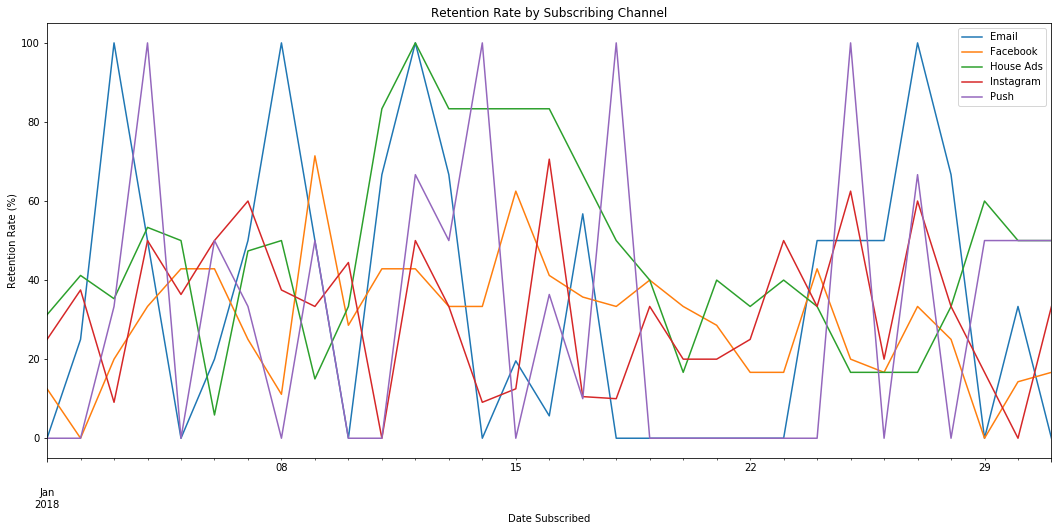

In [27]:
# Plot retention rate
retention_rate_df.plot(figsize =(18,8))

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc = 'upper right', labels = retention_rate_df.columns.values)
plt.show()

## Building Functions to Automate Analysis
**Wherever there is repetition in your work, consider automation.**

##### Building a Conversion Rate Function - Build a function that takes a DataFrame and list of column names and outputs the conversion rate across the columns

In [28]:
def conversion_rate_function(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()   
    
    # Conversion rate 
    conversion_rate = (column_conv/column_total)*100
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

### Test and Visualize Conversion Rate Function

* **Conversion Rate by Age Group**

In [29]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate_function(marketing, ['date_served', 'age_group'])
print(age_group_conv)

date_served  age_group  
2018-01-01   0-18 years     15.517241
             19-24 years    19.672131
             24-30 years    10.526316
             30-36 years     4.081633
             36-45 years     4.255319
                              ...    
2018-01-31   24-30 years     5.769231
             30-36 years     0.000000
             36-45 years     3.508772
             45-55 years     2.325581
             55+ years       2.631579
Name: user_id, Length: 217, dtype: float64


In [30]:
# Unstack and create a DataFrame out of age_group_conv
age_group_df = pd.DataFrame(age_group_conv.unstack(level =1))
age_group_df.head()

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
date_served,,,,,,,
2018-01-01,15.517241,19.672131,10.526316,4.081633,4.255319,2.222222,8.695652
2018-01-02,18.032787,16.438356,11.475410,4.000000,4.347826,4.347826,2.439024
2018-01-03,10.204082,20.895522,15.094340,4.255319,6.000000,4.761905,4.347826
2018-01-04,11.764706,20.000000,18.367347,4.545455,4.347826,6.122449,7.317073
2018-01-05,14.285714,25.000000,13.636364,9.090909,6.818182,4.651163,8.888889


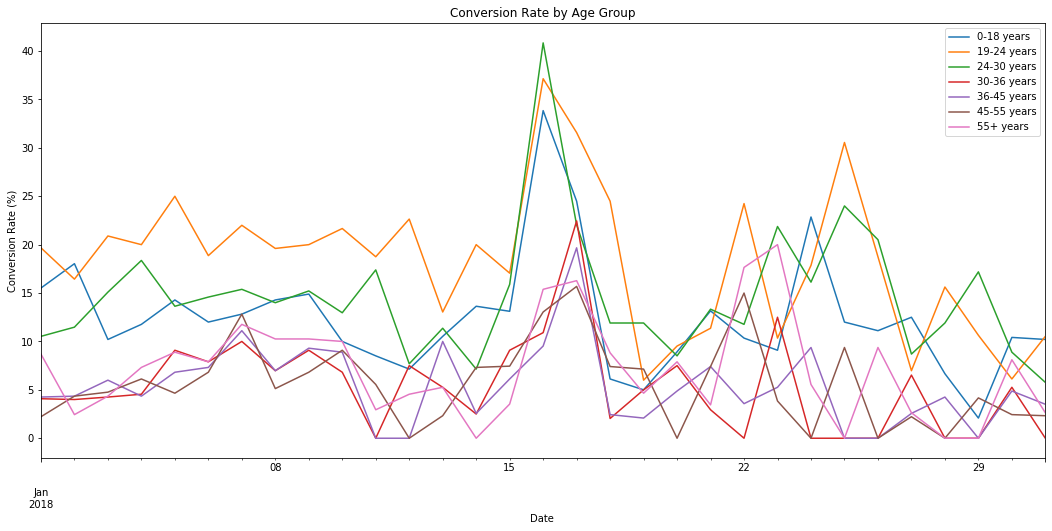

In [31]:
# Visualize conversion by age_group
age_group_df.plot(figsize =(18,8))

plt.title('Conversion Rate by Age Group')
plt.xlabel('Date ')
plt.ylabel('Conversion Rate (%)')
plt.legend(loc = 'upper right', labels = age_group_df.columns.values)
plt.show()

#### Building Plotting Function - Create a plotting function to make it easier to visualize the results

In [32]:
def plotting_conv(dataframe):
    for column in dataframe:
        plt.figure(figsize=(10,5))
        plt.xticks(rotation = 90)
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' Conversion Rate\n', size=16)
        plt.ylabel('Conversion Rate', size=14)
        plt.xlabel('Date', size=14)
        # Show plot
        plt.show()  

#### Plotting it separately

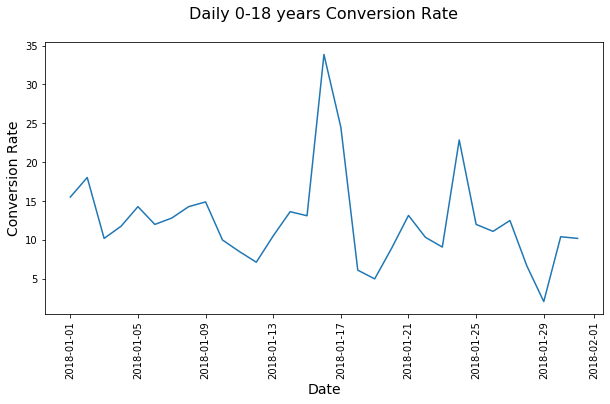

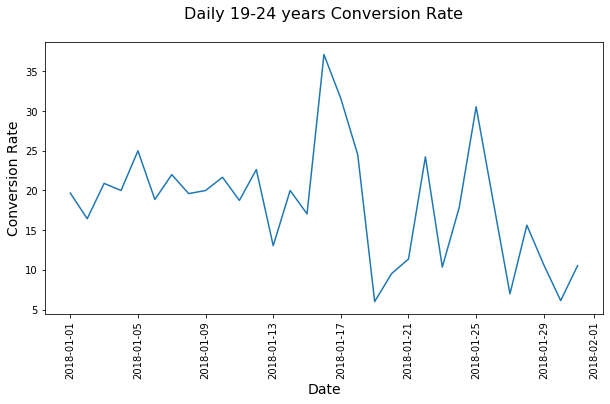

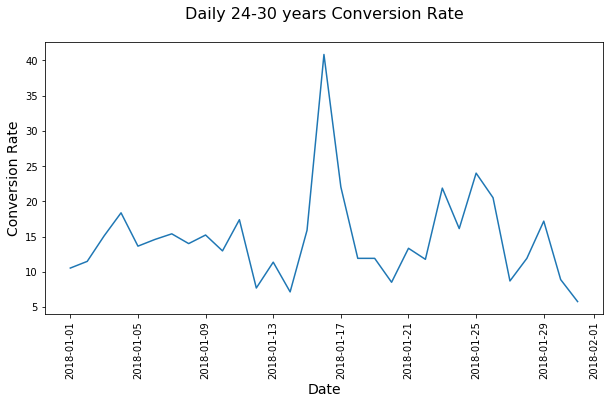

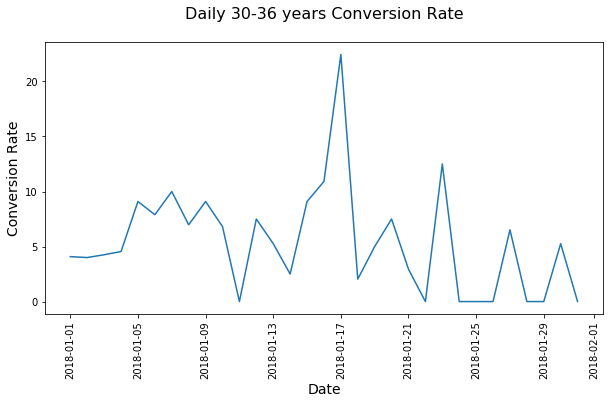

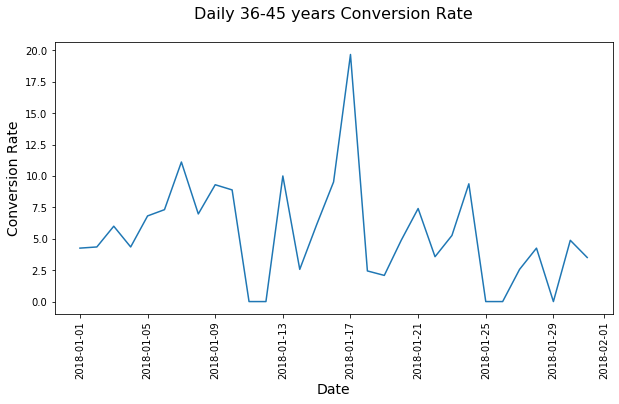

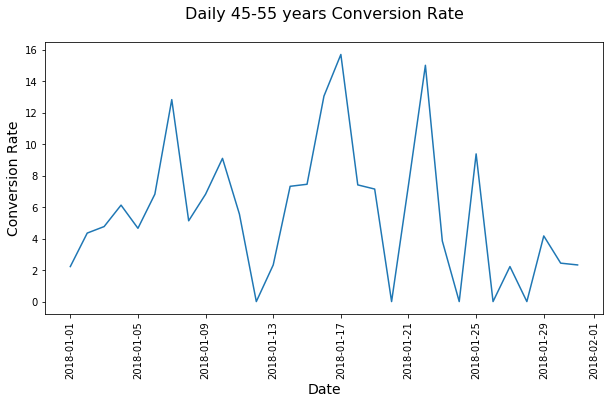

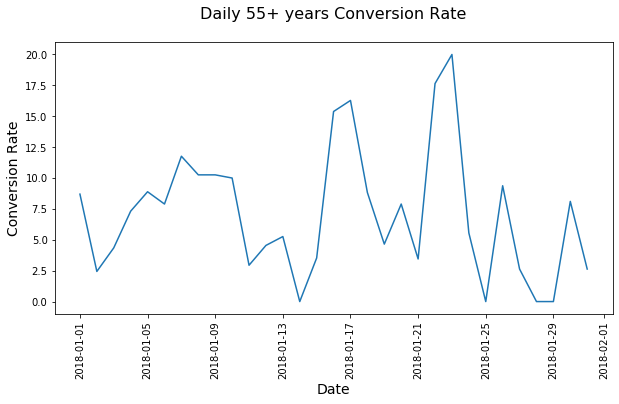

In [33]:
# Plot the results separately
plotting_conv(age_group_df)

* **Conversion Rate by Marketing Channel**

In [34]:
# Calculate conversion rate by marketing_channel
marketing_channel_conv = conversion_rate_function(marketing, ['date_served', 'marketing_channel'])
print(marketing_channel_conv)

date_served  marketing_channel
2018-01-01   Email                100.000000
             Facebook              11.764706
             House Ads              8.465608
             Instagram             10.666667
             Push                   8.333333
                                     ...    
2018-01-31   Email                100.000000
             Facebook               7.894737
             House Ads              3.821656
             Instagram              4.109589
             Push                   5.263158
Name: user_id, Length: 155, dtype: float64


In [35]:
# Unstack and create a DataFrame out of marketing_channel_conv
marketing_channel_df = pd.DataFrame(marketing_channel_conv.unstack(level=1))
marketing_channel_df

marketing_channel,Email,Facebook,House Ads,Instagram,Push
date_served,,,,,
2018-01-01,100.000000,11.764706,8.465608,10.666667,8.333333
2018-01-02,100.000000,9.836066,7.798165,12.903226,5.555556
2018-01-03,0.000000,8.064516,8.854167,17.187500,8.333333
2018-01-04,50.000000,13.846154,8.982036,12.698413,5.882353
2018-01-05,100.000000,11.290323,12.658228,15.942029,2.777778
2018-01-06,60.000000,11.111111,11.184211,9.523810,6.896552
2018-01-07,100.000000,9.615385,14.503817,17.543860,8.823529
2018-01-08,100.000000,13.636364,10.389610,12.500000,6.451613
2018-01-09,50.000000,12.068966,12.738854,15.254237,5.405405


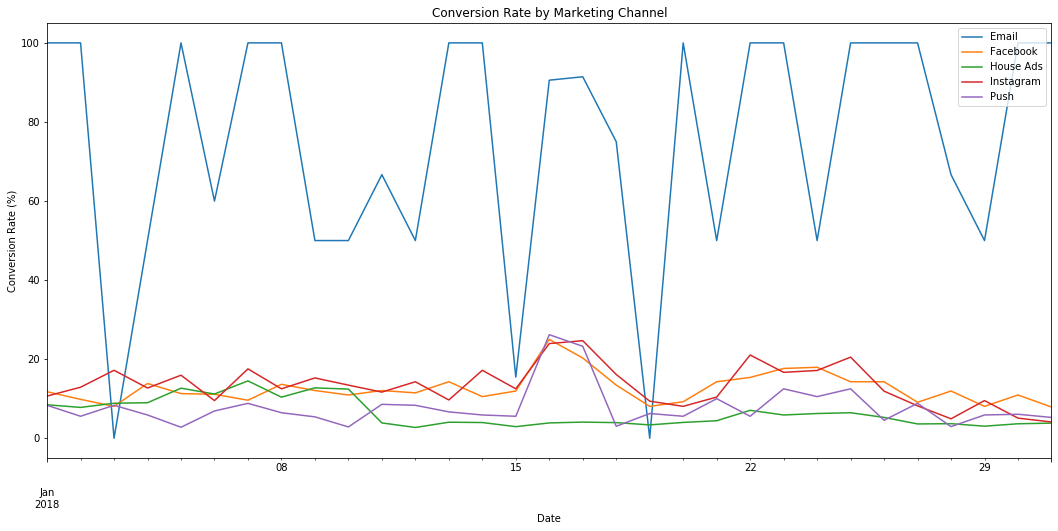

In [36]:
# Visualize conversion by marketing_channel
marketing_channel_df.plot(figsize =(18,8))

plt.title('Conversion Rate by Marketing Channel')
plt.xlabel('Date')
plt.ylabel('Conversion Rate (%)')
plt.legend(loc = 'upper right', labels = marketing_channel_df.columns.values)
plt.show()

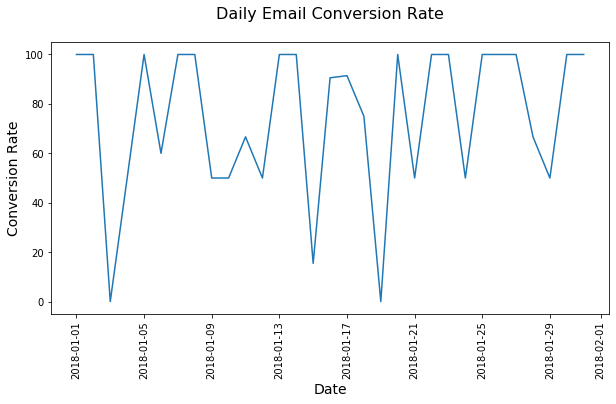

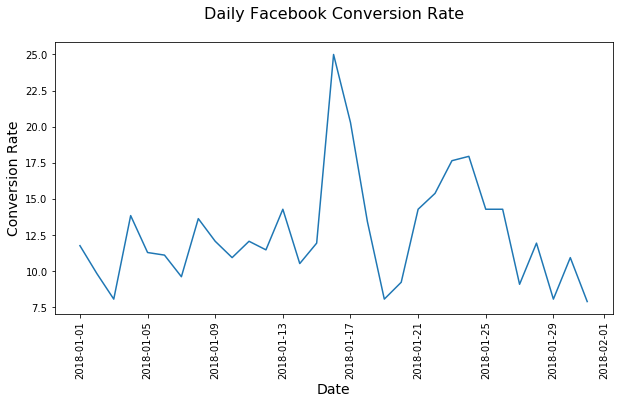

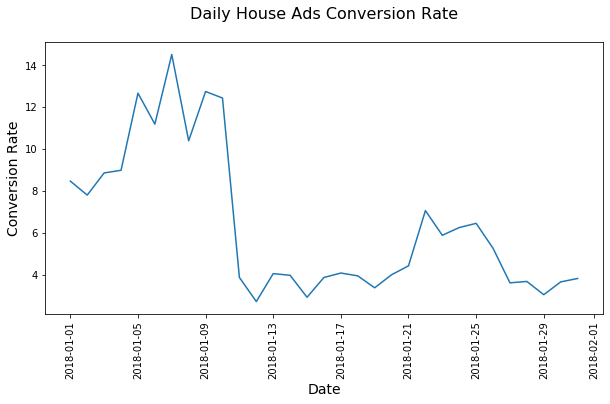

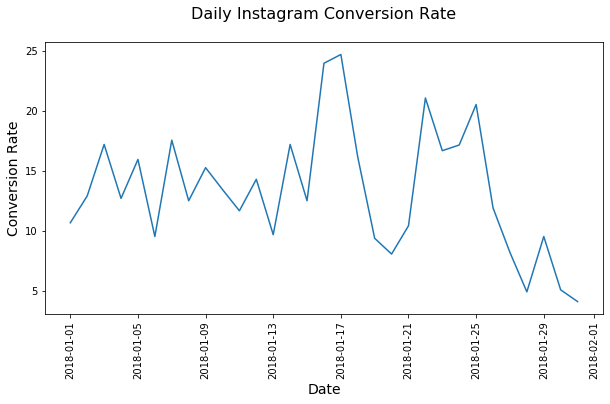

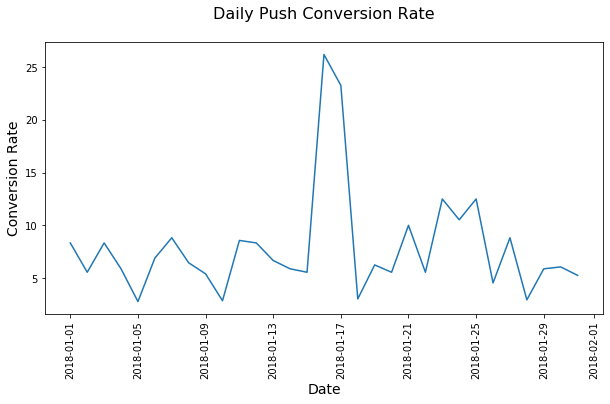

In [37]:
# Plot the results separately
plotting_conv(marketing_channel_df)

#### We can see that there is a sudden decrease in the house ads conversion rate on and after January 11

It's important to identify if the fluctuations are due to expected shifts in user behavior (i.e., differences across the day of the week) versus a larger problem in technical implementation or marketing strategy.

* **Day of the Week Conversion Rate by Marketing Channel**

In [38]:
# Add a dow column
marketing['dow'] = marketing['date_subscribed'].dt.dayofweek

In [39]:
# Calculate conversion rate by day of week
dow_conversion = conversion_rate_function(marketing, ['dow', 'marketing_channel'])
print(dow_conversion)

dow  marketing_channel
0.0  Email                80.392157
     Facebook             78.260870
     House Ads            55.681818
     Instagram            77.083333
     Push                 55.555556
1.0  Email                90.625000
     Facebook             72.413793
     House Ads            46.551724
     Instagram            75.438596
     Push                 59.375000
2.0  Email                88.095238
     Facebook             67.241379
     House Ads            49.557522
     Instagram            78.333333
     Push                 69.230769
3.0  Email                72.727273
     Facebook             71.428571
     House Ads            42.857143
     Instagram            84.210526
     Push                 72.727273
4.0  Email                80.000000
     Facebook             83.333333
     House Ads            48.611111
     Instagram            90.909091
     Push                 41.176471
5.0  Email                81.818182
     Facebook             75.675676
     

In [40]:
# Unstack and create a DataFrame out of DoW_conversion
dow_df = pd.DataFrame(dow_conversion.unstack(level=1))
dow_df

marketing_channel,Email,Facebook,House Ads,Instagram,Push
dow,,,,,
0.0,80.392157,78.260870,55.681818,77.083333,55.555556
1.0,90.625000,72.413793,46.551724,75.438596,59.375000
2.0,88.095238,67.241379,49.557522,78.333333,69.230769
3.0,72.727273,71.428571,42.857143,84.210526,72.727273
4.0,80.000000,83.333333,48.611111,90.909091,41.176471
5.0,81.818182,75.675676,50.000000,81.481481,56.250000
6.0,75.000000,67.567568,55.384615,80.555556,61.538462


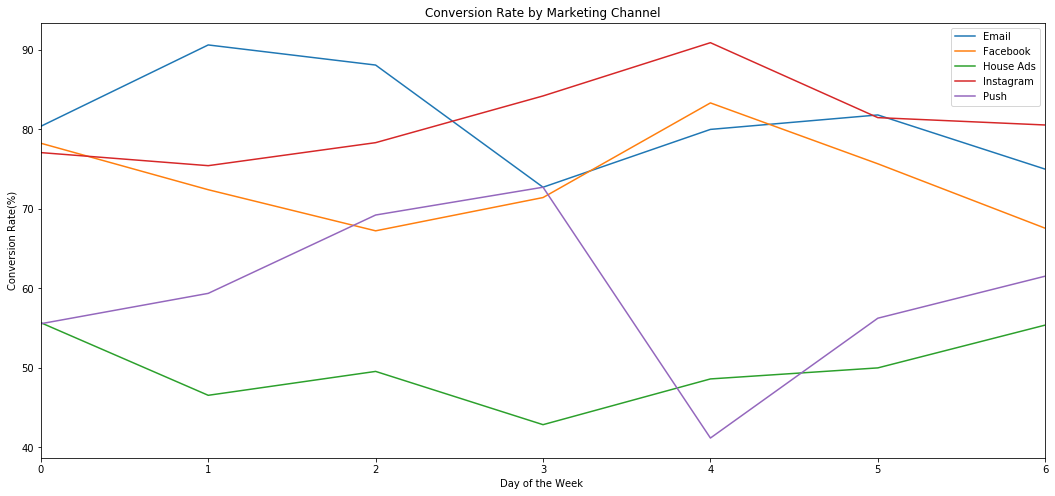

In [41]:
# Visualize conversion by marketing_channel
dow_df.plot(figsize =(18,8))
plt.title('Conversion Rate by Marketing Channel')
plt.xlabel('Day of the Week ')
plt.ylabel('Conversion Rate(%)')
plt.legend(loc='upper right', labels = dow_df.columns.values)
plt.show()

In [42]:
def plotting_conv_dow(dataframe):
    for column in dataframe:
        plt.figure(figsize=(10,5))
        plt.xticks(rotation = 90)
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Weekly ' + str(column) + ' Conversion Rate\n',size = 16)
        plt.ylabel('Conversion Rate', size = 14)
        plt.xlabel('Day of the Week', size = 14)
        # Show plot
        plt.show()  

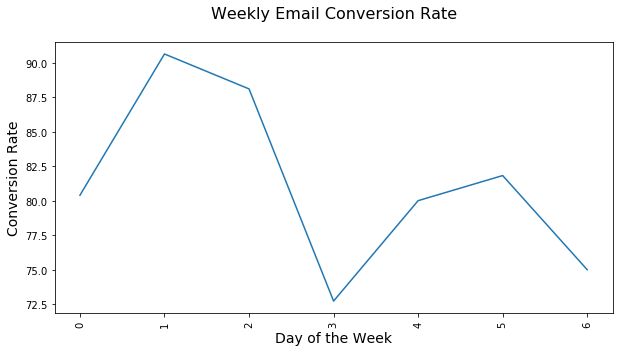

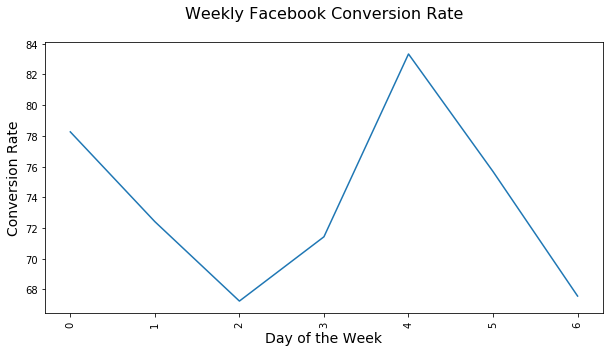

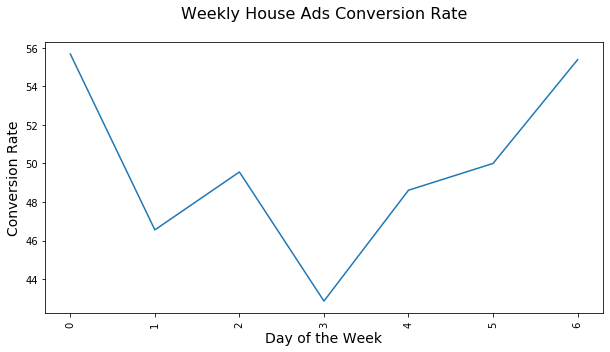

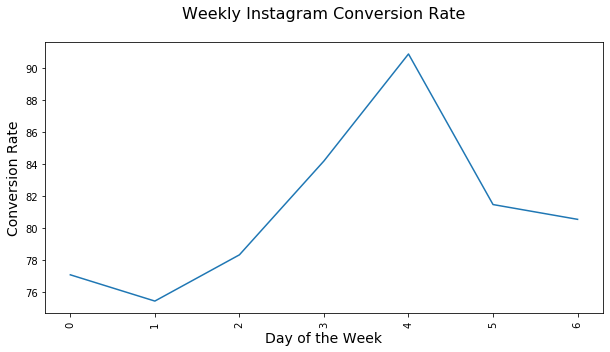

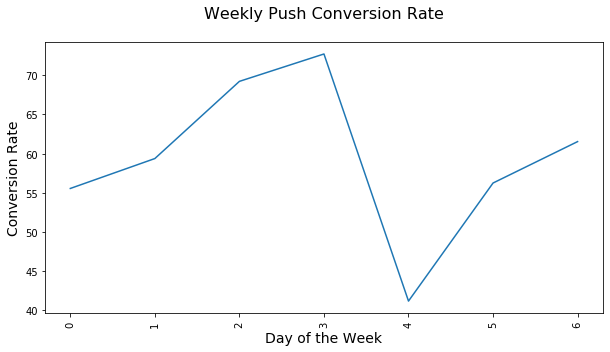

In [43]:
# Plot the results separately
plotting_conv_dow(dow_df)

* **House Ads Conversion by Language**

In [44]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel'] == 'House Ads']

# Calculate conversion by date served and language displayed
conv_lang_channel = conversion_rate_function(house_ads, ['date_served','language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))
conv_lang_df

language_displayed,Arabic,English,German,Spanish
date_served,,,,
2018-01-01,100.0,7.514451,20.000000,0.000000
2018-01-02,0.0,6.896552,60.000000,0.000000
2018-01-03,0.0,8.379888,33.333333,12.500000
2018-01-04,0.0,8.053691,0.000000,21.428571
2018-01-05,NaN,11.888112,0.000000,21.428571
2018-01-06,100.0,8.759124,0.000000,20.000000
2018-01-07,100.0,11.764706,100.000000,12.500000
2018-01-08,NaN,7.971014,50.000000,20.000000
2018-01-09,NaN,12.925170,NaN,10.000000


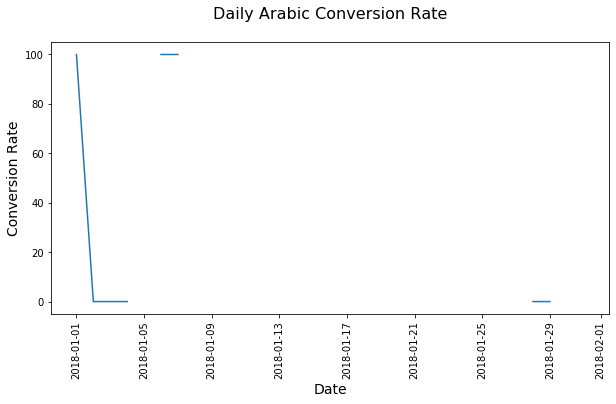

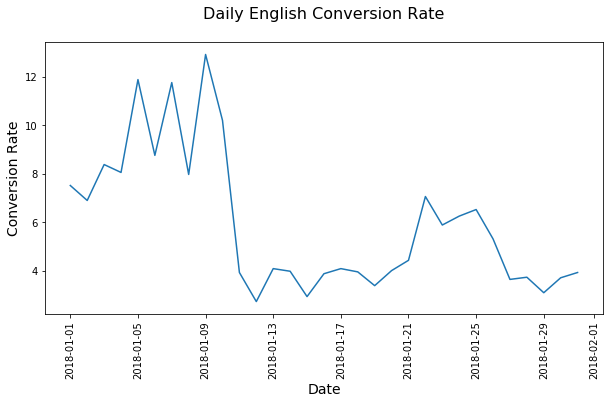

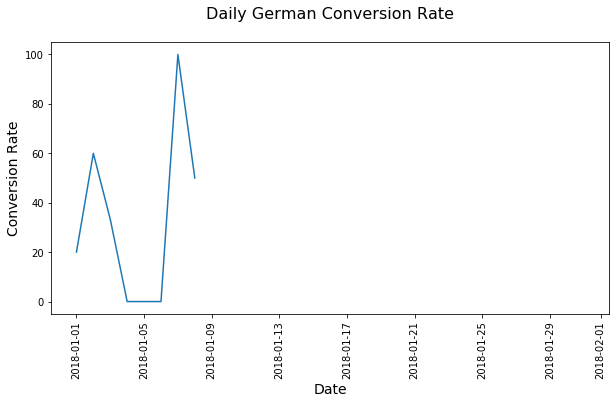

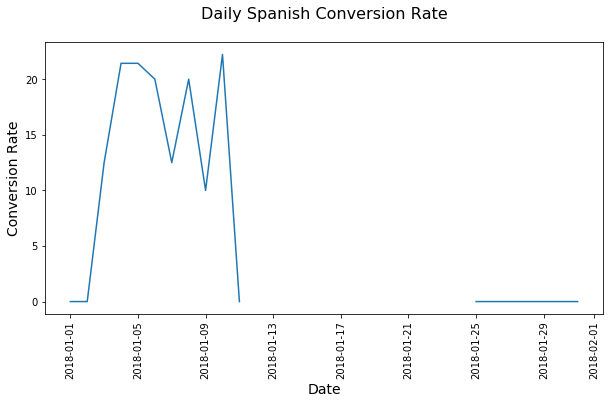

In [45]:
# Use plotting function to display results
plotting_conv(conv_lang_df)

 #### There is a weird pattern around language preferences.

In [46]:
# Groupby date_served and is_correct_lang
language_check = house_ads.groupby(['date_served','is_correct_lang'])['is_correct_lang'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Print results
print(language_check_df)

is_correct_lang    No    Yes
date_served                 
2018-01-01        2.0  189.0
2018-01-02        3.0  247.0
2018-01-03        0.0  220.0
2018-01-04        0.0  168.0
2018-01-05        0.0  160.0
2018-01-06        1.0  151.0
2018-01-07        2.0  130.0
2018-01-08        0.0  154.0
2018-01-09        0.0  157.0
2018-01-10        0.0  170.0
2018-01-11       20.0  135.0
2018-01-12       18.0  130.0
2018-01-13       26.0  122.0
2018-01-14       20.0  131.0
2018-01-15       16.0  192.0
2018-01-16       28.0  127.0
2018-01-17       21.0  127.0
2018-01-18       31.0  121.0
2018-01-19       22.0  127.0
2018-01-20       28.0  124.0
2018-01-21       14.0  100.0
2018-01-22       13.0   72.0
2018-01-23       16.0   69.0
2018-01-24       13.0   83.0
2018-01-25       19.0   74.0
2018-01-26       24.0   92.0
2018-01-27       18.0  149.0
2018-01-28       28.0  136.0
2018-01-29       24.0  142.0
2018-01-30       23.0  145.0
2018-01-31       23.0  135.0


Calculate what percentage of users were being served ads in the right language and plot the results

In [47]:
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

language_check_df.head

<bound method NDFrame.head of is_correct_lang    No    Yes       pct
date_served                           
2018-01-01        2.0  189.0  0.989529
2018-01-02        3.0  247.0  0.988000
2018-01-03        0.0  220.0  1.000000
2018-01-04        0.0  168.0  1.000000
2018-01-05        0.0  160.0  1.000000
2018-01-06        1.0  151.0  0.993421
2018-01-07        2.0  130.0  0.984848
2018-01-08        0.0  154.0  1.000000
2018-01-09        0.0  157.0  1.000000
2018-01-10        0.0  170.0  1.000000
2018-01-11       20.0  135.0  0.870968
2018-01-12       18.0  130.0  0.878378
2018-01-13       26.0  122.0  0.824324
2018-01-14       20.0  131.0  0.867550
2018-01-15       16.0  192.0  0.923077
2018-01-16       28.0  127.0  0.819355
2018-01-17       21.0  127.0  0.858108
2018-01-18       31.0  121.0  0.796053
2018-01-19       22.0  127.0  0.852349
2018-01-20       28.0  124.0  0.815789
2018-01-21       14.0  100.0  0.877193
2018-01-22       13.0   72.0  0.847059
2018-01-23       16.0   69.0  0.81

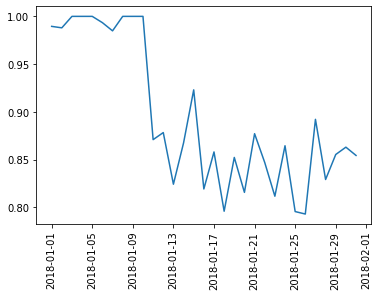

In [48]:
# Plot and show your results
plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.xticks(rotation = 90)
plt.show()

#### It seems like percentage of users who were seeing House Ads in their preferred language decreased after January 11.

## Assessing the Bug Impact
## Dip in Conversion Rate?

##### As we have seen that the language is the issue with House Ads conversion, lets' check how many subscriers have been lost as a result of this bug.

Index non-English language conversion rates against English conversion rates in the time period before the language bug arose i.e before january 11

In [49]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate_function(house_ads_bug,['language_displayed']) 
lang_conv

language_displayed
Arabic     50.000000
English     9.909281
German     44.444444
Spanish    16.666667
Name: user_id, dtype: float64

In [50]:
# Index other language conversion rate against English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']

In [51]:
print("Arabic index:", arabic_index)
print("German index:", german_index)
print("Spanish index:", spanish_index)

Arabic index: 5.045774647887324
German index: 4.485133020344288
Spanish index: 1.6819248826291078


##### Spanish speaking users typically convert at a 1.7 times rate compared to English speakers and German Speakers convert at about 4.5 times as compared to English speakers

#### Daily Conversions

In [52]:
# Group house_ads by date and language
converted = house_ads.groupby(['date_served', 'language_preferred']).agg({'user_id':'nunique','converted':'sum'})
converted.head()

user_id converted
date_served language_preferred                   
2018-01-01  Arabic                    2         2
            English                 171        13
            German                    5         1
            Spanish                  11         0
2018-01-02  Arabic                    3         0

In [53]:
# Unstack converted
converted_df = pd.DataFrame(converted.unstack(level=1))
converted_df.head()

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0         2      13      1   
2018-01-02             3.0   200.0    5.0    10.0         0      14      3   
2018-01-03             2.0   179.0    3.0     8.0         0      15      1   
2018-01-04             2.0   149.0    2.0    14.0         0      12      0   
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False   

                            
language_preferred Spanish  
date_served                 
2018-01-01               0  
2018-01-02               0  
2018-01-03               1  
2018-01-04               3  
2018-01-05               3

In [54]:
# Create English converted column for affected period
converted_df['english_converted'] = converted_df.loc['2018-01-11':'2018-01-31'][('converted','English')]
converted_df.head(20)

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0         2      13      1   
2018-01-02             3.0   200.0    5.0    10.0         0      14      3   
2018-01-03             2.0   179.0    3.0     8.0         0      15      1   
2018-01-04             2.0   149.0    2.0    14.0         0      12      0   
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False   
2018-01-06             3.0   136.0    2.0    11.0         3      12      0   
2018-01-07             2.0   117.0    2.0    10.0         2      14      2   
2018-01-08             NaN   138.0    6.0    10.0       NaN      11      3   
2018-01-09             NaN   147.0    NaN    10.0       NaN      19    NaN   
2018-01-10             NaN   147.0    4.0    18.0       NaN      15      2   
2018-01-11             7.0   133.0    2.0    13.0         0       6      0   
2018-01-12             3.0   129.0    4.0    11.0         0       3      0   
2018-01-13             6.0   121.0    5.0    16.0         0       5      1   
2018-01-14             5.0   131.0    3.0    12.0         0       6      0   
2018-01-15             2.0   189.0    4.0    10.0         0       6      0   
2018-01-16             7.0   127.0    4.0    17.0         0       6      0   
2018-01-17             2.0   126.0    3.0    16.0         0       2      0   
2018-01-18             7.0   121.0    6.0    18.0         0       5      1   
2018-01-19             5.0   126.0    5.0    12.0         1       4      0   
2018-01-20             6.0   124.0    6.0    14.0         1       4      1   

                           english_converted  
language_preferred Spanish                    
date_served                                   
2018-01-01               0               NaN  
2018-01-02               0               NaN  
2018-01-03               1               NaN  
2018-01-04               3               NaN  
2018-01-05               3               NaN  
2018-01-06               2               NaN  
2018-01-07               1               NaN  
2018-01-08               2               NaN  
2018-01-09               1               NaN  
2018-01-10               4               NaN  
2018-01-11               0                 6  
2018-01-12               1                 3  
2018-01-13               0                 5  
2018-01-14               0                 6  
2018-01-15               0                 6  
2018-01-16               0                 6  
2018-01-17               4                 2  
2018-01-18               0                 5  
2018-01-19               0                 4  
2018-01-20               0                 4

In [55]:
# Create expected conversion rates for each language
converted_df['expected_arabic_rate'] = converted_df['english_converted']*arabic_index
converted_df['expected_german_rate'] = converted_df['english_converted']*german_index
converted_df['expected_spanish_rate'] = converted_df['english_converted']*spanish_index
converted_df.head(20)

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0         2      13      1   
2018-01-02             3.0   200.0    5.0    10.0         0      14      3   
2018-01-03             2.0   179.0    3.0     8.0         0      15      1   
2018-01-04             2.0   149.0    2.0    14.0         0      12      0   
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False   
2018-01-06             3.0   136.0    2.0    11.0         3      12      0   
2018-01-07             2.0   117.0    2.0    10.0         2      14      2   
2018-01-08             NaN   138.0    6.0    10.0       NaN      11      3   
2018-01-09             NaN   147.0    NaN    10.0       NaN      19    NaN   
2018-01-10             NaN   147.0    4.0    18.0       NaN      15      2   
2018-01-11             7.0   133.0    2.0    13.0         0       6      0   
2018-01-12             3.0   129.0    4.0    11.0         0       3      0   
2018-01-13             6.0   121.0    5.0    16.0         0       5      1   
2018-01-14             5.0   131.0    3.0    12.0         0       6      0   
2018-01-15             2.0   189.0    4.0    10.0         0       6      0   
2018-01-16             7.0   127.0    4.0    17.0         0       6      0   
2018-01-17             2.0   126.0    3.0    16.0         0       2      0   
2018-01-18             7.0   121.0    6.0    18.0         0       5      1   
2018-01-19             5.0   126.0    5.0    12.0         1       4      0   
2018-01-20             6.0   124.0    6.0    14.0         1       4      1   

                           english_converted expected_arabic_rate  \
language_preferred Spanish                                          
date_served                                                         
2018-01-01               0               NaN                  NaN   
2018-01-02               0               NaN                  NaN   
2018-01-03               1               NaN                  NaN   
2018-01-04               3               NaN                  NaN   
2018-01-05               3               NaN                  NaN   
2018-01-06               2               NaN                  NaN   
2018-01-07               1               NaN                  NaN   
2018-01-08               2               NaN                  NaN   
2018-01-09               1               NaN                  NaN   
2018-01-10               4               NaN                  NaN   
2018-01-11               0                 6              30.2746   
2018-01-12               1                 3              15.1373   
2018-01-13               0                 5              25.2289   
2018-01-14               0                 6              30.2746   
2018-01-15               0                 6              30.2746   
2018-01-16               0                 6              30.2746   
2018-01-17               4                 2              10.0915   
2018-01-18               0                 5              25.2289   
2018-01-19               0                 4              20.1831   
2018-01-20               0                 4              20.1831   

                   expected_german_rate expected_spanish_rate  
language_preferred                                             
date_served                                                    
2018-01-01                          NaN                   NaN  
2018-01-02                          NaN                   NaN  
2018-01-03                          NaN                   NaN  
2018-01-04                          NaN                   NaN  
2018-01-05                          NaN                   NaN  
2018-01-06                          NaN                   NaN  
2018-01-07                          NaN                   Na

In [56]:
# Multiply number of users by the expected conversion rate
converted_df['expected_spanish_converted'] = converted_df['expected_spanish_rate']/100*converted_df[('user_id','Spanish')]
converted_df['expected_arabic_converted'] = converted_df['expected_arabic_rate']/100*converted_df[('user_id','Arabic')]
converted_df['expected_german_converted'] = converted_df['expected_german_rate']/100*converted_df[('user_id','German')]

In [57]:
# Use .loc to slice only the relevant dates
converted_df = converted_df.loc['2018-01-11':'2018-01-31']
converted_df

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-11             7.0   133.0    2.0    13.0         0       6      0   
2018-01-12             3.0   129.0    4.0    11.0         0       3      0   
2018-01-13             6.0   121.0    5.0    16.0         0       5      1   
2018-01-14             5.0   131.0    3.0    12.0         0       6      0   
2018-01-15             2.0   189.0    4.0    10.0         0       6      0   
2018-01-16             7.0   127.0    4.0    17.0         0       6      0   
2018-01-17             2.0   126.0    3.0    16.0         0       2      0   
2018-01-18             7.0   121.0    6.0    18.0         0       5      1   
2018-01-19             5.0   126.0    5.0    12.0         1       4      0   
2018-01-20             6.0   124.0    6.0    14.0         1       4      1   
2018-01-21             1.0    99.0    4.0     9.0     False       5      0   
2018-01-22             2.0    72.0    3.0     8.0         1       4      1   
2018-01-23             3.0    69.0    4.0     9.0         0       5      0   
2018-01-24             2.0    83.0    3.0     8.0         0       6      0   
2018-01-25             3.0    75.0    4.0    11.0         0       4      2   
2018-01-26             6.0    89.0    3.0    16.0         0       4      0   
2018-01-27             3.0   148.0    3.0    12.0         1       4      0   
2018-01-28             5.0   134.0    3.0    21.0         0       4      0   
2018-01-29             7.0   138.0    4.0    15.0         2       3      0   
2018-01-30             4.0   139.0    3.0    18.0         0       4      0   
2018-01-31             7.0   130.0    4.0    16.0         1       4      0   

                           english_converted expected_arabic_rate  \
language_preferred Spanish                                          
date_served                                                         
2018-01-11               0                 6              30.2746   
2018-01-12               1                 3              15.1373   
2018-01-13               0                 5              25.2289   
2018-01-14               0                 6              30.2746   
2018-01-15               0                 6              30.2746   
2018-01-16               0                 6              30.2746   
2018-01-17               4                 2              10.0915   
2018-01-18               0                 5              25.2289   
2018-01-19               0                 4              20.1831   
2018-01-20               0                 4              20.1831   
2018-01-21               0                 5              25.2289   
2018-01-22               0                 4              20.1831   
2018-01-23               0                 5              25.2289   
2018-01-24               0                 6              30.2746   
2018-01-25               0                 4              20.1831   
2018-01-26               2                 4              20.1831   
2018-01-27               1                 4              20.1831   
2018-01-28               2                 4              20.1831   
2018-01-29               0                 3              15.1373   
2018-01-30               2                 4              20.1831   
2018-01-31               1                 4              20.1831   

                   expected_german_rate expected_spanish_rate  \
language_preferred                                              
date_served                                                     
2018-01-11                      26.9108               10.0915   
2018-01-12                      13.4554               5.04577   
2018-01-13                      22.4257               8.40962   
2018-01-14                      26.9108               10.0915   
2018-01-15                      26

In [58]:
# Sum expected subscribers for each language
expected_subscribers = converted_df['expected_spanish_converted'].sum() + converted_df['expected_arabic_converted'].sum() + converted_df['expected_german_converted'].sum()

# Calculate how many subscribers we actually got
actual_subscribers = converted_df[('converted','Spanish')].sum() + converted_df[('converted','Arabic')].sum() + converted_df[('converted','German')].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subscribers - actual_subscribers
print(lost_subs)

32.144143192488265


#### Almost 32 subscribers were lost due to mistakenly serving users English rather than their preferred language

# A/B Testing

* The email portion of this campaign was actually run as an A/B test. 
* Half the emails sent out were generic upsells to the product while the other half contained personalized messaging around the users usage of the site.

In [59]:
# Subset the DataFrame
email = marketing[marketing['marketing_channel']=='Email']
email.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,is_correct_lang,dow
354,a100000526,2018-01-01,Email,personalization,True,Arabic,Arabic,0-18 years,2018-01-01,NaT,Email,False,4.0,Yes,0.0
358,a100000530,2018-01-05,Email,personalization,True,Arabic,Arabic,19-24 years,2018-01-05,NaT,Email,False,4.0,Yes,4.0
362,a100000534,2018-01-09,Email,personalization,False,English,English,45-55 years,2018-01-09,NaT,Email,False,4.0,Yes,1.0
366,a100000538,2018-01-13,Email,personalization,True,Arabic,Arabic,24-30 years,2018-01-13,2018-01-23,Email,True,4.0,Yes,5.0
370,a100000542,2018-01-17,Email,personalization,True,English,English,0-18 years,2018-01-17,2018-02-12,Email,True,4.0,Yes,2.0



* Before beginning analyzing the results, we will check to ensure users were allocated equally to the test and control groups.

In [60]:
# Group the email DataFrame by variant 
allocation = email.groupby(['variant'])['user_id'].nunique()
allocation.head()

variant
control            270
personalization    284
Name: user_id, dtype: int64

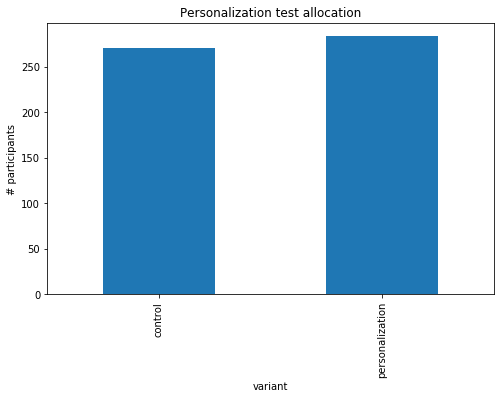

In [61]:
# Plot a bar chart of the test allocation
allocation.plot(kind='bar',figsize =(8,5))
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

Now as we know that the allocation is relatively even let's look at the conversion rate for the control and personalization. Since we chose conversion rate as the KEY METRIC for this test, it is highly important that we evaluate whether or not conversion was higher in the personalization treatment compared with the control

#### Comparing Conversion Rates for the two groups

In [62]:
# Group marketing by user_id and variant
subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
subscribers.head()

user_id     variant        
a100000526  personalization     True
a100000530  personalization     True
a100000534  personalization    False
a100000538  personalization     True
a100000542  personalization     True
Name: converted, dtype: bool

In [63]:
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 
subscribers_df.head()

variant,control,personalization
user_id,,
a100000526,NaN,True
a100000530,NaN,True
a100000534,NaN,False
a100000538,NaN,True
a100000542,NaN,True


In [64]:
# Drop missing values from the control column
control = subscribers_df['control'].dropna()

# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()

In [65]:
control_conversion_rate = np.mean(control)
treatment_conversion_rate= personalization_conversion_rate= np.mean(personalization)

In [66]:
print(control_conversion_rate)
print(treatment_conversion_rate)

0.2814814814814815
0.3908450704225352


## Lift

Lift can be calculated by calculating the difference between the treatment effect (or the mean) of the treatment compared to the treatment effect of the control divided by the treatment effect of the control. 

In [67]:
lift = (treatment_conversion_rate - control_conversion_rate)/control_conversion_rate

In [68]:
print("lift:",str(round(lift*100,2)) + '%')

lift: 38.85%


#### We can see that the personalization variant has about 39% improvement in conversion rate as compared to normal variant.

## Create a function to automate the process of calculating lift.

In [69]:
def lift(a,b):
    # Calcuate the mean of a and b 
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean-a_mean)/a_mean
  
    return str(round(lift*100, 2)) + '%'

In [70]:
# Print lift() with control and personalization as inputs
print(lift(control, personalization))

38.85%


* Now that we know the personalization variant outperformed the control, let's determine whether the result is statistically significant. 
* Statistical significance is vital to understanding whether a test showed a positive result by chance or if it is reflective of a true difference between the variants.

## T-Test

In [71]:
from scipy.stats import ttest_ind

In [72]:
t = ttest_ind(control,personalization)

In [73]:
print(t)

Ttest_indResult(statistic=-2.7343299447505074, pvalue=0.006451487844694175)


* **A p-value less than 0.05 is typically considered statistically significant at 95% significance level**
* **Since the p-value here is less than 0.05 we can be confident that the difference in conversion rate is statistically significant.**

* One of the most common pitfalls in A/B testing is assuming that the treatment equally affects the population.
* Treatments are particularly effective on users of specific engagement level, age, race or any other number of factors.
* It is important to break down the results by various demographics in order to obtain the holistic understanding of the impact of the test.

## A/B Testing & Segmentation


In [74]:
for language in np.unique(marketing['language_displayed'].values):
    print(language)
    
    language_data = marketing[(marketing['marketing_channel'] == 'Email') & (marketing['language_displayed']== language)]
    language_data.head()

    subscribers = language_data.groupby(['user_id','variant'])['converted'].max()
    subscribers.head()

    subsribers_df = pd.DataFrame(subscribers.unstack(level =1))
    subsribers_df.head()

    control = subsribers_df['control'].dropna()
    personalization = subsribers_df['personalization'].dropna()
    
    print('Lift:',lift(control,personalization))
    print('t-statistic:',ttest_ind(control, personalization), '\n\n')

Arabic
Lift: 50.0%
t-statistic: Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001) 


English
Lift: 39.0%
t-statistic: Ttest_indResult(statistic=-2.2183598646203166, pvalue=0.026991701290720815) 


German
Lift: -1.62%
t-statistic: Ttest_indResult(statistic=0.1910083418078718, pvalue=0.8494394170062678) 


Spanish
Lift: 166.67%
t-statistic: Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524) 




#### We can see that the test performed well among English and Spanish speakers, while for Arabic and German the results are not statistically significant.

## Building an A/B Test Segmenting Function

* When running experiments, it is important to check how new features are affecting specific demographics. 
* Sometimes features that are highly appealing to one group are less appealing to others.

* If we want to segment our data multiple times, it is better to build a function ab_segmentation() that analyzes the impact of the A/B tests on segments of data that can be reused each time whenever we want to conduct this kind of analysis.

In [75]:
def ab_segmentation(segment):
  # Build a for loop for each segment in marketing
  for subsegment in np.unique(marketing[segment].values):
    print(subsegment)
      
    # Limit marketing to email and subsegment      
    email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]

    subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
    subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
    control = subscribers['control'].dropna()
    personalization = subscribers['personalization'].dropna()

    print('lift:', lift(control, personalization))
    print('t-statistic:', ttest_ind(control, personalization), '\n\n')

**This function will take in a column name and run through each unique value in that column calculating lift and statistical significance.**

In [76]:
# Use ab_segmentation on language displayed
ab_segmentation('age_group')

0-18 years
lift: 121.4%
t-statistic: Ttest_indResult(statistic=-2.966044912142211, pvalue=0.0038724494391297226) 


19-24 years
lift: 106.24%
t-statistic: Ttest_indResult(statistic=-3.03179438478667, pvalue=0.0030623836114689134) 


24-30 years
lift: 161.19%
t-statistic: Ttest_indResult(statistic=-3.861539544326876, pvalue=0.00018743381094867337) 


30-36 years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.1859064644147996, pvalue=0.0023238487431765137) 


36-45 years
lift: -85.23%
t-statistic: Ttest_indResult(statistic=2.4317901279318503, pvalue=0.01797568600978829) 


45-55 years
lift: -72.22%
t-statistic: Ttest_indResult(statistic=2.065499127317933, pvalue=0.043062339688201196) 


55+ years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.3265654564203397, pvalue=0.0016358623456360435) 




We found that personalization was extremely effective for younger groups but less effective than the control for older groups. One explanation might be that younger users understand how their data might be used online and think personalization is cool because it gives them more insight into themselves while older people might feel that this is a violation of their privacy.